In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
# from haversine import haversine
import time  # start = time.time() / print(time.time()-start)
import shapely
from shapely.geometry import Point, Polygon, LineString
from geopy.distance import distance
import json
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdmn
from itertools import product, combinations, permutations, combinations_with_replacement

plt.rcParams['font.family'] = 'Malgun Gothic'


/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
import geopandas as gpd
data = gpd.read_file('Final.json')
data

,gid,basic_S_Dot_YN,factory_micro,construction_micro,factory_noise,construction_noise,bus_passenger_count,subway_passenger_count,subway_noise_buffer300,subway_noise_buffer_YN,...,FGCR_AADT,river_YN,mountain_YN,park_YN,commercial_district_YN,gas_usage,env_facility_count,public_institution_YN,building_20_count,geometry
0,다사350508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.000000,1,0,0,0,0.0,0,0,0,"MULTIPOLYGON (((126.76410 37.55426, 126.76409 ..."
1,다사350509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.000000,1,0,0,0,0.0,0,0,0,"MULTIPOLYGON (((126.76409 37.55516, 126.76408 ..."
2,다사351507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4013.000000,1,0,0,0,0.0,0,0,0,"MULTIPOLYGON (((126.76524 37.55336, 126.76523 ..."
3,다사351508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4011.000000,1,0,0,0,0.0,0,0,0,"MULTIPOLYGON (((126.76523 37.55426, 126.76522 ..."
4,다사351509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,1259.000000,1,0,0,0,0.0,0,0,0,"MULTIPOLYGON (((126.76522 37.55516, 126.76521 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61644,다사720495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,26161.000000,0,1,0,0,0.0,0,0,0,"MULTIPOLYGON (((127.18303 37.54441, 127.18303 ..."
61645,다사720496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,10071.000000,0,1,0,0,0.0,0,0,0,"MULTIPOLYGON (((127.18303 37.54531, 127.18303 ..."
61646,다사720499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,243.916667,0,1,0,0,0.0,0,0,0,"MULTIPOLYGON (((127.18302 37.54801, 127.18302 ..."
61647,다사720501,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,255.625000,0,1,0,0,0.0,0,0,0,"MULTIPOLYGON (((127.18301 37.54981, 127.18301 ..."


In [ ]:
data.columns

Index(['gid', 'basic_S_Dot_YN', 'factory_micro', 'construction_micro',
       'factory_noise', 'construction_noise', 'bus_passenger_count',
       'subway_passenger_count', 'subway_noise_buffer300',
       'subway_noise_buffer_YN', 'cctv_YN', 'val_total', 'val_senior',
       'val_junior', 'sig', 'val_basic_livelihood_sig', 'all_AADT',
       'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT', 'river_YN', 'mountain_YN',
       'park_YN', 'commercial_district_YN', 'gas_usage', 'env_facility_count',
       'public_institution_YN', 'building_20_count', 'geometry'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [ ]:
feature = data[['factory_micro', 'construction_micro', 'factory_noise', 'construction_noise', 'bus_passenger_count',
       'subway_passenger_count', 'subway_noise_buffer300', 'subway_noise_buffer_YN', 'val_total', 'val_senior',
       'val_junior', 'val_basic_livelihood_sig', 'all_AADT', 'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT', 'river_YN', 'mountain_YN',
       'park_YN', 'commercial_district_YN', 'gas_usage', 'env_facility_count','building_20_count']]
target = data.basic_S_Dot_YN

In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61649 entries, 0 to 61648
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   factory_micro             61649 non-null  float64
 1   construction_micro        61649 non-null  float64
 2   factory_noise             61649 non-null  float64
 3   construction_noise        61649 non-null  float64
 4   bus_passenger_count       61649 non-null  float64
 5   subway_passenger_count    61649 non-null  float64
 6   subway_noise_buffer300    61649 non-null  float64
 7   subway_noise_buffer_YN    61649 non-null  int64  
 8   val_total                 61649 non-null  float64
 9   val_senior                61649 non-null  float64
 10  val_junior                61649 non-null  float64
 11  val_basic_livelihood_sig  61649 non-null  float64
 12  all_AADT                  61649 non-null  float64
 13  PSCR_AADT                 61649 non-null  float64
 14  BUS_AA

In [ ]:
import numpy as np
import pandas as pd
pd.concat([feature, target], axis=1).corr()

,factory_micro,construction_micro,factory_noise,construction_noise,bus_passenger_count,subway_passenger_count,subway_noise_buffer300,subway_noise_buffer_YN,val_total,val_senior,...,BUS_AADT,FGCR_AADT,river_YN,mountain_YN,park_YN,commercial_district_YN,gas_usage,env_facility_count,building_20_count,basic_S_Dot_YN
factory_micro,1.000000,-0.015620,0.663725,-0.013124,-0.040844,-0.054756,-0.054756,-0.024608,-0.039373,-0.035134,...,0.101205,0.052321,0.068642,-0.054258,-0.015353,-0.038713,-0.003871,0.044476,-0.005212,-0.005112
construction_micro,-0.015620,1.000000,-0.000015,0.843379,0.225677,0.308139,0.308139,0.253503,0.131887,0.109044,...,-0.036858,0.041366,-0.045801,-0.226214,-0.091768,0.283639,0.033987,-0.002669,0.040639,0.049593
factory_noise,0.663725,-0.000015,1.000000,0.002523,-0.021596,-0.032109,-0.032109,-0.019696,-0.026893,-0.023667,...,0.066169,0.032690,0.041914,-0.025575,-0.008876,-0.019187,-0.004063,0.025046,-0.004291,-0.002139
construction_noise,-0.013124,0.843379,0.002523,1.000000,0.197293,0.248288,0.248288,0.205518,0.098837,0.077427,...,-0.031138,0.035355,-0.039527,-0.184750,-0.077016,0.241213,0.029183,-0.000202,0.033328,0.037765
bus_passenger_count,-0.040844,0.225677,-0.021596,0.197293,1.000000,0.299288,0.299288,0.240598,0.135181,0.119543,...,-0.062209,0.041081,-0.027519,-0.195863,-0.098209,0.281685,0.049767,-0.013381,0.047744,0.065599
subway_passenger_count,-0.054756,0.308139,-0.032109,0.248288,0.299288,1.000000,1.000000,0.586886,0.158158,0.132610,...,-0.044366,0.051572,-0.059374,-0.335063,-0.113362,0.355835,0.055618,-0.027343,0.073480,0.054037
subway_noise_buffer300,-0.054756,0.308139,-0.032109,0.248288,0.299288,1.000000,1.000000,0.586886,0.158158,0.132610,...,-0.044366,0.051572,-0.059374,-0.335063,-0.113362,0.355835,0.055618,-0.027343,0.073480,0.054037
subway_noise_buffer_YN,-0.024608,0.253503,-0.019696,0.205518,0.240598,0.586886,0.586886,1.000000,0.277700,0.254433,...,-0.046503,0.060608,0.033565,-0.359190,-0.133326,0.267021,0.046317,-0.011470,0.050711,0.056101
val_total,-0.039373,0.131887,-0.026893,0.098837,0.135181,0.158158,0.158158,0.277700,1.000000,0.888236,...,-0.101996,-0.066663,-0.048240,-0.181974,-0.144934,0.180655,0.067800,-0.037611,0.122827,0.062197
val_senior,-0.035134,0.109044,-0.023667,0.077427,0.119543,0.132610,0.132610,0.254433,0.888236,1.000000,...,-0.100559,-0.065086,-0.032542,-0.147859,-0.135688,0.185526,0.052830,-0.036550,0.077818,0.081213


### 종속변수와 독립변수들 간의 상관성 확인 

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

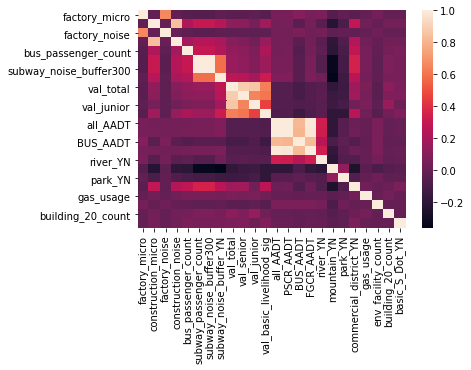

In [ ]:
import seaborn as sns
sns.heatmap(pd.concat([feature, target],axis=1).corr())

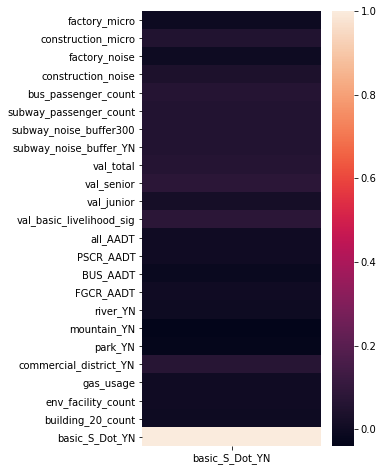

In [ ]:
# plt.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns
pd.DataFrame(pd.concat([feature, target],axis=1).corr().iloc[21,:]).T
fig = plt.figure(figsize=(4,8))
fig = sns.heatmap(pd.DataFrame(pd.concat([feature, target],axis=1).corr().iloc[23,:]))


In [ ]:
target.value_counts()

0.0    60600
1.0     1049
Name: basic_S_Dot_YN, dtype: int64

In [ ]:
feature.shape

(61649, 23)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


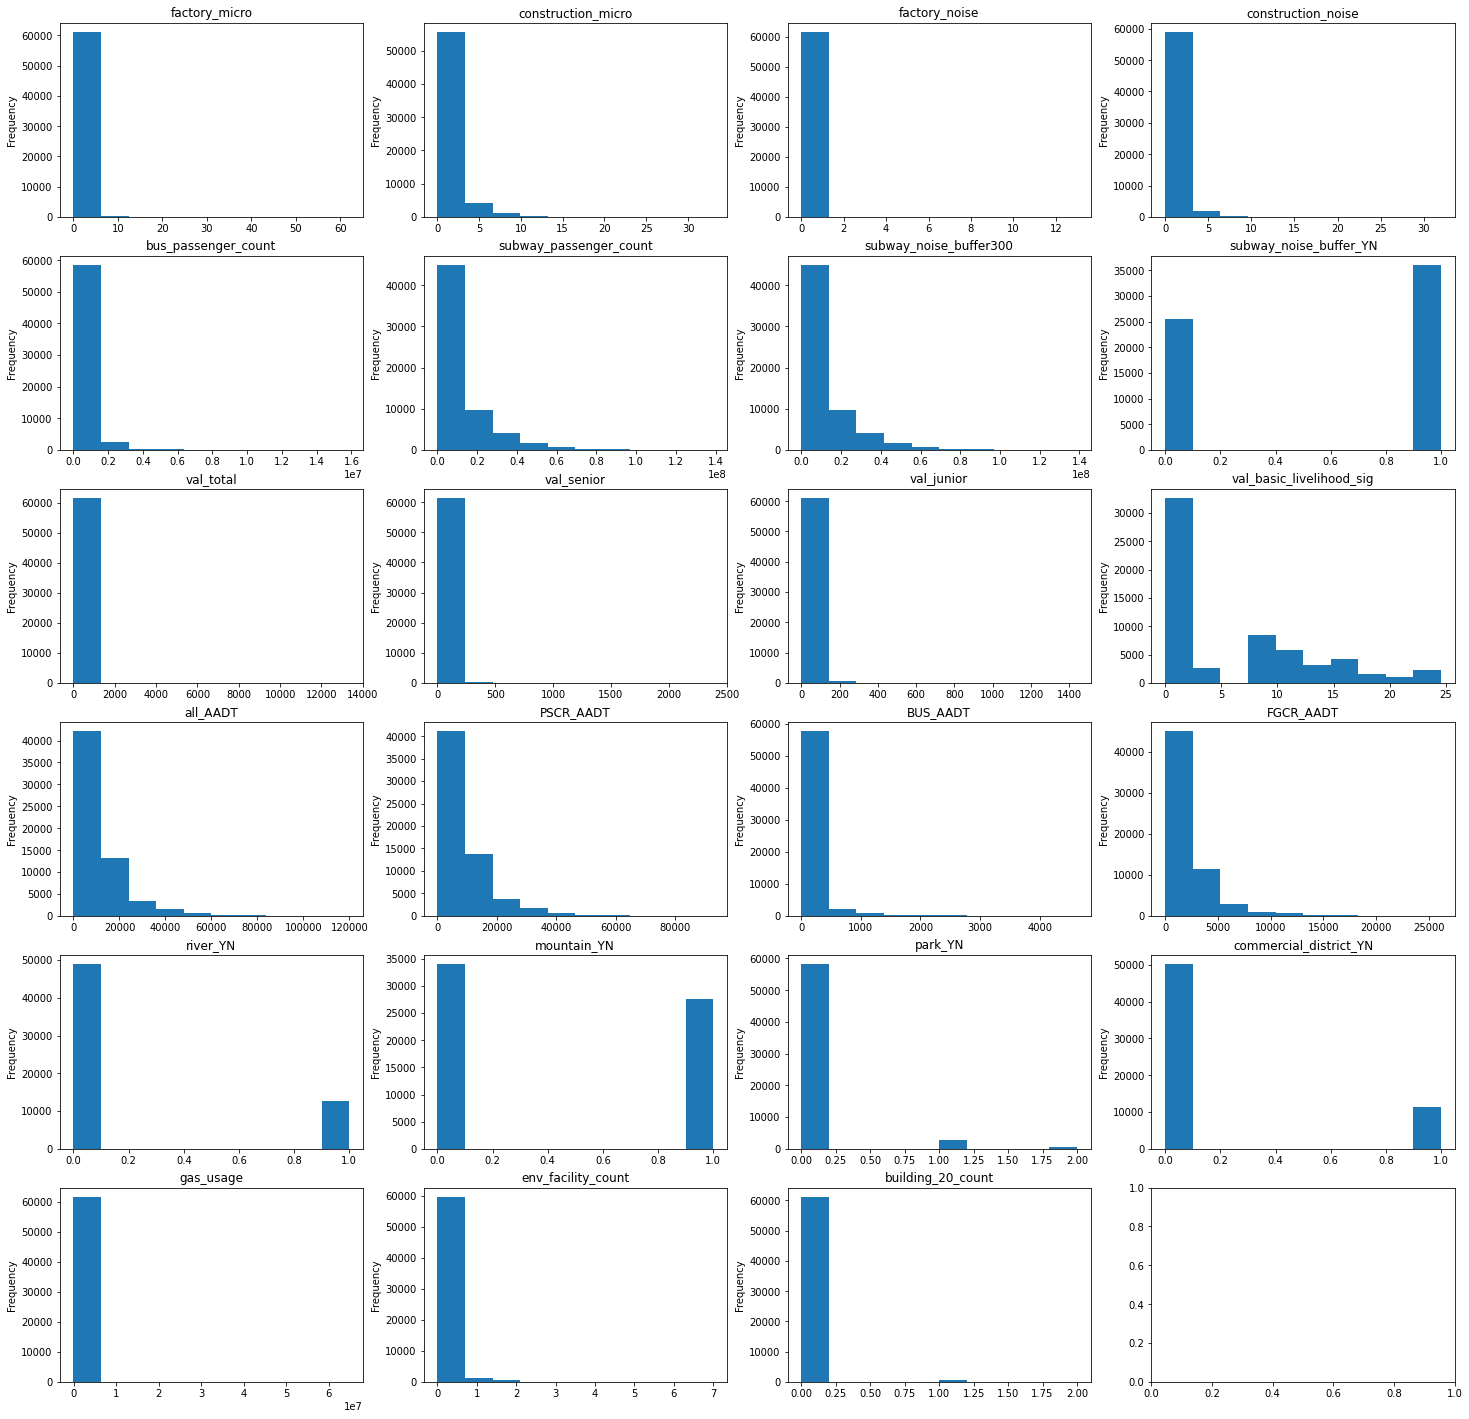

In [ ]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots(6,4, figsize=(25,25))
ax = axes.flatten()
for i in range(23):
    feature.iloc[:,i].plot(kind='hist', ax= ax[i], title=feature.columns[i])
    #sns.distplot(feature.iloc[:,i], ax=ax[i])

**모든 변수가 0의 비율이 크게나타난다는 특징이 존재**

## Scaling 비교 적용
### 원본 

<AxesSubplot:ylabel='Frequency'>

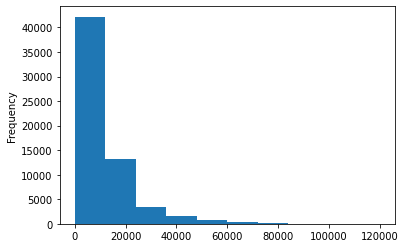

In [ ]:
feature.all_AADT.plot(kind='hist')

### 정규화

/opt/app-root/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

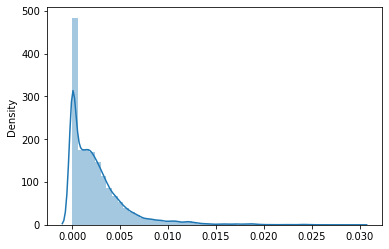

In [ ]:
from sklearn.preprocessing import Normalizer
nomalize = Normalizer()
sns.distplot(nomalize.fit_transform(feature.all_AADT.values.reshape(1, -1)))

### 표준화

/opt/app-root/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/app-root/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

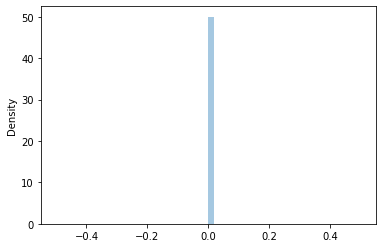

In [ ]:
from sklearn.preprocessing import StandardScaler 
SS = StandardScaler()
sns.distplot(SS.fit_transform(feature.all_AADT.values.reshape(1, -1)))

### MinMax

<AxesSubplot:ylabel='Frequency'>

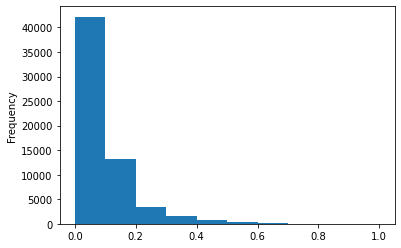

In [ ]:
((feature.all_AADT - feature.all_AADT.min()) /( feature.all_AADT.max() - feature.all_AADT.min()) ).plot(kind='hist')

**all_AADT변수를 기준으로 정규화, 표준화, MinMax 스케일링을 비교해본 결과**  
-> 값의 범위를 0~1 값으로 스케일링 하는 MinMax 스케일링 방법을 적용 하여 모델을 돌리기로 결정함.

In [ ]:
feature.columns

Index(['factory_micro', 'construction_micro', 'factory_noise',
       'construction_noise', 'bus_passenger_count', 'subway_passenger_count',
       'subway_noise_buffer300', 'subway_noise_buffer_YN', 'val_total',
       'val_senior', 'val_junior', 'val_basic_livelihood_sig', 'all_AADT',
       'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT', 'river_YN', 'mountain_YN',
       'park_YN', 'commercial_district_YN', 'gas_usage', 'env_facility_count',
       'building_20_count'],
      dtype='object')

#### MinMax 스케일링 적용

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
feature_scaled=pd.DataFrame(MM.fit_transform(feature.drop(['subway_noise_buffer_YN', 'river_YN', 'mountain_YN',  'commercial_district_YN'], axis=1)))
feature_scaled.columns = ['factory_micro', 'construction_micro', 'factory_noise','construction_noise', 'bus_passenger_count', 'subway_passenger_count', 
                          'subway_noise_buffer300',  'val_total', 'val_senior', 'val_junior', 'val_basic_livelihood_sig', 'all_AADT',
                          'PSCR_AADT', 'BUS_AADT', 'FGCR_AADT','park_YN', 'gas_usage', 'env_facility_count','building_20_count']

feature_scaled = pd.concat([feature_scaled, feature[['subway_noise_buffer_YN', 'river_YN', 'mountain_YN',  'commercial_district_YN']]], axis=1)
feature_scaled


,factory_micro,construction_micro,factory_noise,construction_noise,bus_passenger_count,subway_passenger_count,subway_noise_buffer300,val_total,val_senior,val_junior,...,BUS_AADT,FGCR_AADT,park_YN,gas_usage,env_facility_count,building_20_count,subway_noise_buffer_YN,river_YN,mountain_YN,commercial_district_YN
0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000351,0.0,0.0,0,1,0,0
1,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000351,0.0,0.0,0,1,0,0
2,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067106,0.153396,0.0,0.000351,0.0,0.0,0,1,0,0
3,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.067106,0.153320,0.0,0.000351,0.0,0.0,0,1,0,0
4,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024098,0.048125,0.0,0.000351,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61644,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.732440,1.000000,0.0,0.000351,0.0,0.0,0,0,1,0
61645,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.281968,0.384962,0.0,0.000351,0.0,0.0,0,0,1,0
61646,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006358,0.009324,0.0,0.000351,0.0,0.0,0,0,1,0
61647,0.0,0.030303,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006457,0.009771,0.0,0.000351,0.0,0.0,0,0,1,0


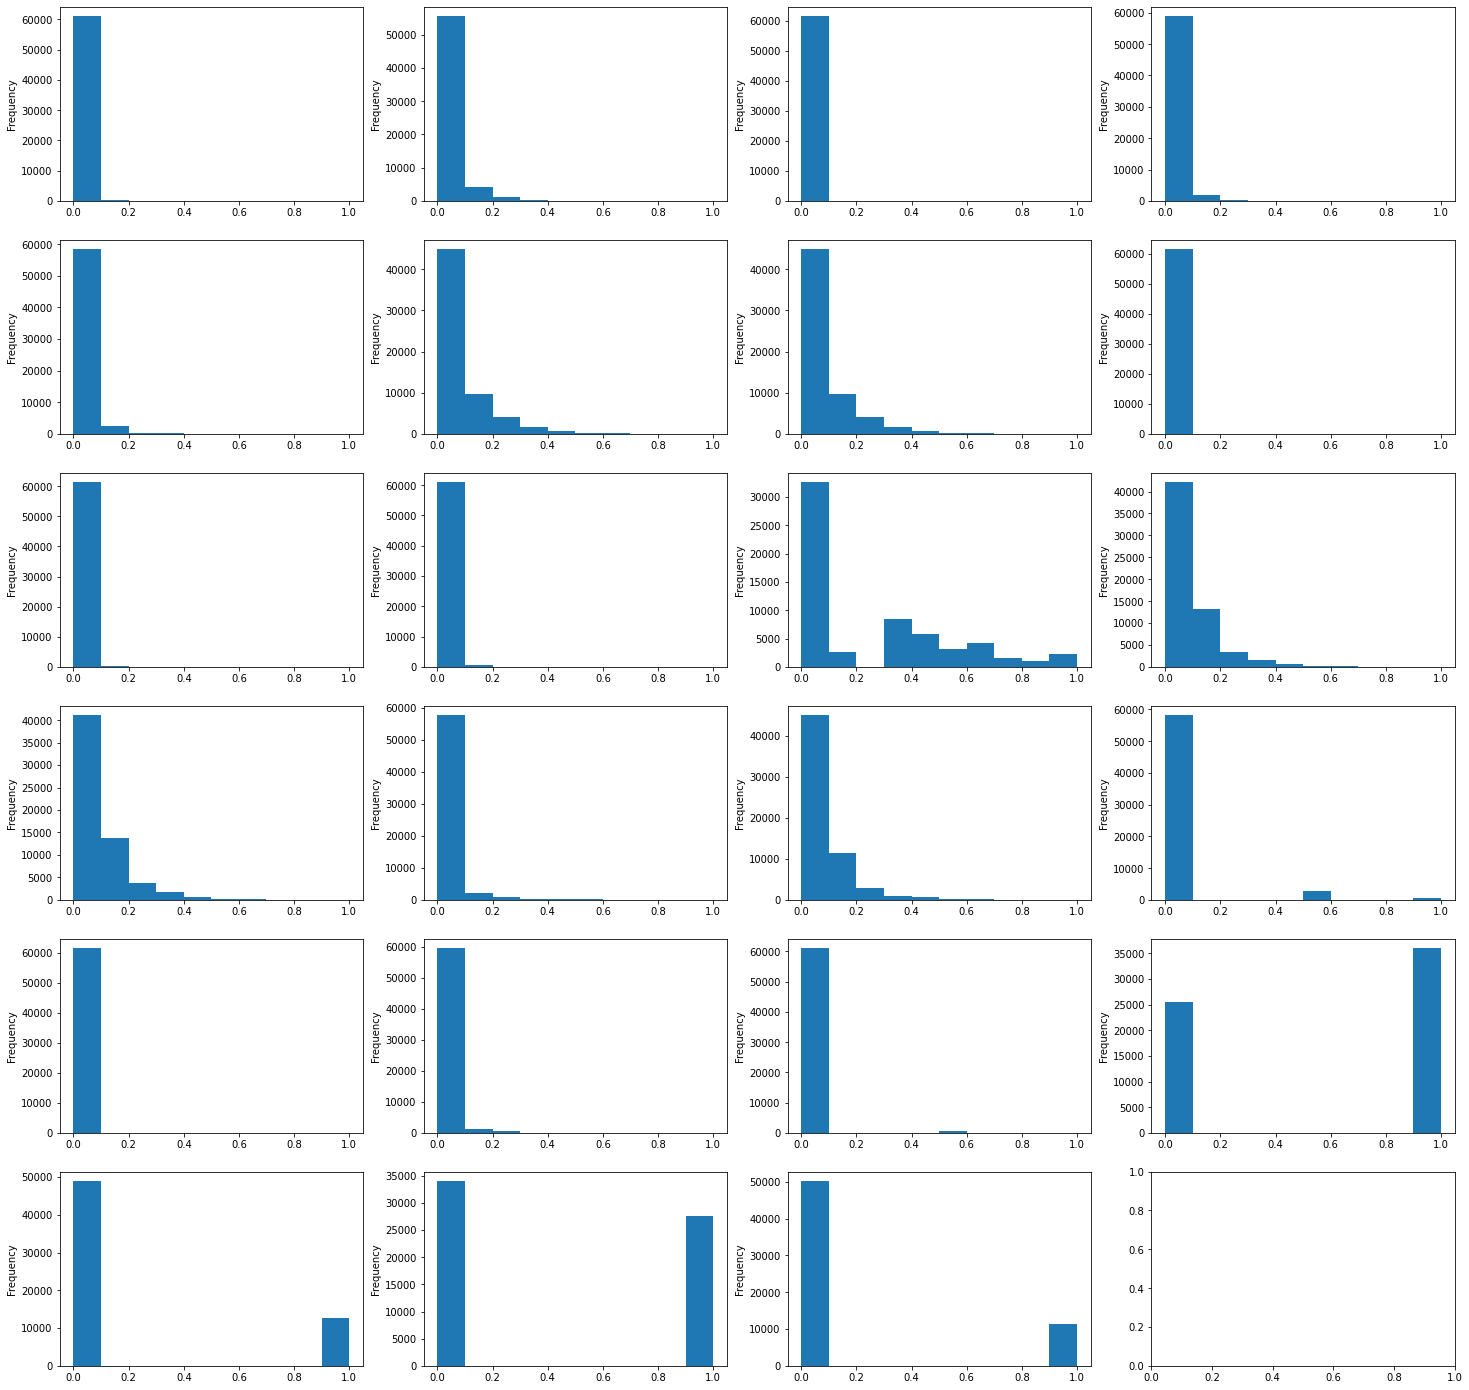

In [ ]:
import matplotlib.pyplot as plt
fig, axes= plt.subplots(6,4, figsize=(25,25))
ax = axes.flatten()
for i in range(23):
    feature_scaled.iloc[:,i].plot(kind='hist', ax= ax[i])
    #sns.distplot(tem.iloc[:,i], ax=ax[i])

### 스케일 적용 후종속변수(기본센서설치여부)와 독립변수들 간의 상관성 확인 

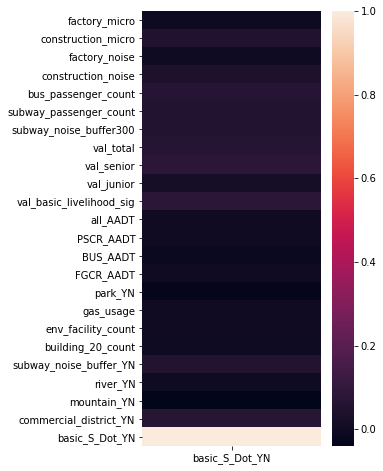

In [ ]:
# plt.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns
pd.DataFrame(pd.concat([feature_scaled, target],axis=1).corr().iloc[21,:]).T
fig = plt.figure(figsize=(4,8))
fig = sns.heatmap(pd.DataFrame(pd.concat([feature_scaled, target],axis=1).corr().iloc[23,:]))


나아 진 것이 없어 보임

### 오버샘플링 적용
 - 종속변수의 비율이 0에 치우쳐져 있으므로 오버샘플링을 통해 범주별 개수를 맞춰주는 작업 시행
 - 적용 알고리즘 : ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
# strategy = {1:76, 2:76, 3:76, 5:76, 6:76, 7:76}
X_resampled, y_resampled = ADASYN().fit_resample(feature_scaled, target)

In [ ]:
X_resampled

,factory_micro,construction_micro,factory_noise,construction_noise,bus_passenger_count,subway_passenger_count,subway_noise_buffer300,val_total,val_senior,val_junior,...,BUS_AADT,FGCR_AADT,park_YN,gas_usage,env_facility_count,building_20_count,subway_noise_buffer_YN,river_YN,mountain_YN,commercial_district_YN
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000351,0.0,0.0,0,1,0,0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000351,0.0,0.0,0,1,0,0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.067106,0.153396,0.0,0.000351,0.0,0.0,0,1,0,0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.067106,0.153320,0.0,0.000351,0.0,0.0,0,1,0,0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.024098,0.048125,0.0,0.000351,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120846,0.0,0.006897,0.0,0.007112,0.006327,0.0,0.0,0.0,0.0,0.0,...,0.001752,0.011301,0.0,0.000359,0.0,0.0,0,0,0,0
120847,0.0,0.019217,0.0,0.019817,0.003291,0.0,0.0,0.0,0.0,0.0,...,0.001768,0.010282,0.0,0.000372,0.0,0.0,0,0,0,0
120848,0.0,0.030303,0.0,0.031250,0.013773,0.0,0.0,0.0,0.0,0.0,...,0.007825,0.072196,0.0,0.000552,0.0,0.0,0,0,0,0
120849,0.0,0.005407,0.0,0.005576,0.006694,0.0,0.0,0.0,0.0,0.0,...,0.001750,0.011424,0.0,0.000357,0.0,0.0,0,0,0,0


In [ ]:
target.value_counts()

0.0    60600
1.0     1049
Name: basic_S_Dot_YN, dtype: int64

In [ ]:
y_resampled.value_counts()

0.0    60600
1.0    60251
Name: basic_S_Dot_YN, dtype: int64

### Logistic 회귀 모델 적용

In [ ]:
# logistic = LogisticRegression(class_weight='balanced')
logistic = LogisticRegression()
logistic.fit(X_resampled, y_resampled)

/opt/app-root/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
logistic.predict(X_resampled).sum()

66209.0

In [ ]:
pd.Series(logistic.coef_.round(3).tolist()[0], index=X_resampled.columns)

factory_micro               -0.872
construction_micro           0.903
factory_noise                0.254
construction_noise          -0.725
bus_passenger_count          3.966
subway_passenger_count       0.236
subway_noise_buffer300       0.236
val_total                    2.241
val_senior                  17.360
val_junior                 -14.191
val_basic_livelihood_sig     1.319
all_AADT                     0.606
PSCR_AADT                    0.747
BUS_AADT                    -6.025
FGCR_AADT                    1.197
park_YN                     -4.672
gas_usage                   -0.223
env_facility_count          -0.695
building_20_count           -2.266
subway_noise_buffer_YN       0.418
river_YN                     0.023
mountain_YN                 -0.182
commercial_district_YN       0.359
dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_resampled, logistic.predict(X_resampled))

array([[39413, 21187],
       [15229, 45022]])

In [ ]:
logistic.predict_proba(X_resampled)

array([[0.75643536, 0.24356464],
       [0.75643536, 0.24356464],
       [0.74910284, 0.25089716],
       ...,
       [0.72554928, 0.27445072],
       [0.74891187, 0.25108813],
       [0.73008184, 0.26991816]])

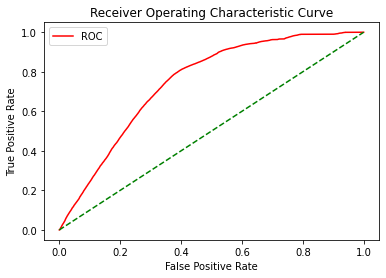

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve

# classification_report(y_resampled, logistic.predict(X_resampled))
logistic.predict_proba(X_resampled)
fper, tper, thresholds = roc_curve(np.asarray(y_resampled), logistic.predict_proba(X_resampled)[:, 1])

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fper, tper)

In [ ]:
fper, tper, thresholds

(array([0.00000000e+00, 1.65016502e-05, 3.96039604e-04, ...,
        9.99917492e-01, 9.99950495e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99608152e+00, 9.96081520e-01, 9.74804752e-01, ...,
        9.73962483e-04, 9.52175339e-04, 2.70513059e-04]))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_resampled, logistic.predict(X_resampled))

-0.20532899855187714

### Logistic Regression (가중적용)
 - 앞서는 오버샘플링한 자료를 통해 적합시켜보았다면 이번에는 원본 데이터를 가지고 가중을 적용하여 학습시키는 모델 적용

In [ ]:
logistic_bal = LogisticRegression(class_weight='balanced')
logistic_bal.fit(feature, target)

LogisticRegression(class_weight='balanced')

In [ ]:
logistic_bal.predict(feature).sum()

31432.0

In [ ]:
pd.Series(logistic_bal.coef_.tolist()[0], index=feature.columns)

factory_micro              -3.786130e-10
construction_micro          1.089224e-09
factory_noise              -1.732723e-11
construction_noise          5.001758e-10
bus_passenger_count         3.782702e-07
subway_passenger_count      5.629485e-09
subway_noise_buffer300      5.629485e-09
subway_noise_buffer_YN     -7.734143e-12
val_total                   2.405314e-07
val_senior                  6.996433e-08
val_junior                  2.134569e-09
val_basic_livelihood_sig    8.573311e-09
all_AADT                   -9.507530e-06
PSCR_AADT                  -7.436021e-06
BUS_AADT                   -2.272146e-07
FGCR_AADT                  -1.844258e-06
river_YN                   -1.856043e-10
mountain_YN                -7.948109e-10
park_YN                    -2.403947e-10
commercial_district_YN      3.292907e-10
gas_usage                  -1.103949e-07
env_facility_count         -3.865606e-11
building_20_count          -1.627465e-11
dtype: float64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, logistic_bal.predict(feature))

array([[29961, 30639],
       [  256,   793]])

In [ ]:
logistic_bal.predict_proba(feature)

array([[0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.58822144, 0.41177856],
       ...,
       [0.50467455, 0.49532545],
       [0.50519594, 0.49480406],
       [0.50519594, 0.49480406]])

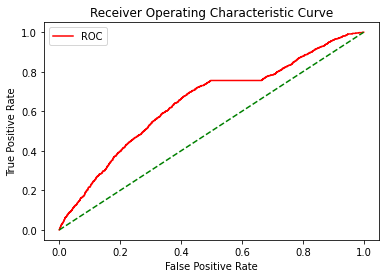

In [ ]:
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve

# classification_report(y_resampled, logistic.predict(X_resampled))
logistic_bal.predict_proba(feature)
fper, tper, thresholds = roc_curve(np.asarray(target), logistic_bal.predict_proba(feature)[:, 1])

plot_roc_curve(fper, tper)

In [ ]:
from sklearn.metrics import r2_score
r2_score(target, logistic.predict(feature))

-40.6282570702256

## Ridge Classifier 적용 

In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_resampled, y_resampled)

RidgeClassifier()

In [ ]:
confusion_matrix(y_resampled, ridge.predict(X_resampled))

array([[39706, 20894],
       [15482, 44769]])

In [ ]:
pd.Series(ridge.coef_.round(3).tolist()[0], index=X_resampled.columns)

factory_micro              -0.392
construction_micro          0.411
factory_noise               0.261
construction_noise         -0.336
bus_passenger_count         1.631
subway_passenger_count      0.127
subway_noise_buffer300      0.127
val_total                   0.884
val_senior                  8.497
val_junior                 -7.170
val_basic_livelihood_sig    0.603
all_AADT                    0.206
PSCR_AADT                   0.244
BUS_AADT                   -1.804
FGCR_AADT                   0.422
park_YN                    -0.773
gas_usage                   0.004
env_facility_count         -0.227
building_20_count          -0.910
subway_noise_buffer_YN      0.175
river_YN                   -0.000
mountain_YN                -0.082
commercial_district_YN      0.163
dtype: float64

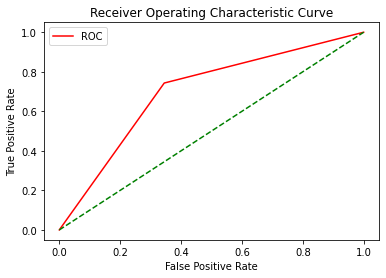

In [ ]:
# classification_report(y_resampled, logistic.predict(X_resampled))
logistic.predict_proba(X_resampled)
fper, tper, thresholds = roc_curve(np.asarray(y_resampled), ridge.predict(X_resampled))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fper, tper)

## 결론
- 회귀모델을 통해 모델의 가중치를 적용하는 것은 힘들어 보임
